In [76]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

# Load Time Profiles

In [77]:
from LoadMultiFiles import LoadOneFileUproot
# dict_events = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/daughter_contribution/time_particle_theta15.root", "Data",
#                   return_list=False)

dict_events = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/root_to_fit/time_particle_theta15_LS_10mm.root", "Data",
                                return_list=False)


# Load Fit Time Constants

In [78]:
# dict_fit = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult_theta15.root", "fitResult",
#                              return_list=False)

dict_fit = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/L_LS_fitResults/fitResult_theta15_L_LS_10mm.root", "fitResult",
                             return_list=False)


In [79]:
from GlobalFunction import SortParameters
df_fit = pd.DataFrame.from_dict(dict_fit)
df_fit = SortParameters(df_fit)
df_fit

,N_nuclei,source,tau1,tau2,tau3,N1,N2,N3,tau1_error,tau2_error,tau3_error,N1_error,N2_error,N3_error
0,2,0,5.306278,26.399379,166.121973,0.771269,0.180386,0.048344,0.015867,0.286877,1.416618,0.002062,0.001825,0.002754
1,4,0,5.289452,25.978030,165.515301,0.763576,0.185783,0.050641,0.032305,0.554832,1.277976,0.004901,0.004344,0.006549
2,6,0,5.257617,26.069695,168.507393,0.750947,0.194401,0.054653,0.021797,0.358585,1.084625,0.003189,0.002826,0.004261
3,10,0,4.000000,26.000000,200.000000,0.456845,0.200007,0.343148,21.146094,36.909799,206.117455,0.234591,0.336593,0.410277
4,12,0,5.238422,28.085787,178.057156,0.713240,0.214023,0.072737,0.025522,0.424129,2.150290,0.002879,0.002535,0.003836
5,14,0,5.272969,29.701370,188.111023,0.717169,0.208355,0.074476,0.014081,0.252581,1.283963,0.001523,0.001347,0.002033
6,16,0,5.330284,31.222392,192.647242,0.707477,0.210006,0.082516,0.019606,0.361367,1.611289,0.002150,0.001909,0.002875
7,18,0,5.245148,32.030433,199.206440,0.680280,0.226882,0.092837,0.017180,0.310188,1.482225,0.001732,0.001538,0.002317
8,20,0,5.294947,34.363565,205.691509,0.668901,0.228925,0.102175,0.021692,0.416412,1.883957,0.002068,0.001866,0.002786
9,22,0,5.295202,34.172445,206.390604,0.674996,0.225275,0.099728,0.014840,0.290499,1.321053,0.001428,0.001281,0.001919


In [80]:
df_time = pd.DataFrame.from_dict(dict_events)
df_time

,time,source,N_nuclei
0,1.493056,0,2
1,13.835931,3,2
2,3.539161,0,2
3,5.849050,0,2
4,10.840994,0,2
...,...,...,...
7285415,7.547296,3,22
7285416,2.265718,1,22
7285417,0.019011,0,22
7285418,0.546149,1,22


In [81]:
from HistTools import PlotHistNormByMax
from GlobalFunction import GlobalVal
bins_time_profile = GlobalVal.bins_time_profile

In [82]:
dict_N2dEdx = {}
with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/BeamEnergy.npz",allow_pickle=True) as f:
    for name_ion, dE_dx in zip(f["name"],f["dE_dx"]):
        dict_N2dEdx[int(name_ion.split("_")[1])] = dE_dx
df_time["dE/dx"] = df_time["N_nuclei"].replace(dict_N2dEdx)

In [83]:
v_name_timing_constant = ["N1", "tau1", "N2", "tau2", "N3", "tau3"]
dir_v_timing_constant = {}

dir_mean_dE_dx_with_quench = {'alpha': 122.773224, 'Co60': 0.6747912, 'AmC': 29.574236}
dir_v_timing_constant[dir_mean_dE_dx_with_quench["Co60"]] = [79.9,4.93,17.1,20.6,3,190]
dir_v_timing_constant[dir_mean_dE_dx_with_quench["AmC"]] = [65,4.93,23.1,34,11.9,220]
dir_v_timing_constant[dir_mean_dE_dx_with_quench["alpha"]] = [65,4.93,22.8,35,12.2,220]

for particle in dir_v_timing_constant.keys():
    for i in range(len(v_name_timing_constant)):
        if "N" in v_name_timing_constant[i]:
            dir_v_timing_constant[particle][i] = dir_v_timing_constant[particle][i]*0.01
df_model = pd.DataFrame.from_dict(dir_v_timing_constant, orient="index", columns=v_name_timing_constant)
df_model

,N1,tau1,N2,tau2,N3,tau3
0.674791,0.799,4.93,0.171,20.6,0.030,190
29.574236,0.650,4.93,0.231,34.0,0.119,220
122.773224,0.650,4.93,0.228,35.0,0.122,220


In [84]:
from scipy.interpolate import interp1d
dict_func_model = {}
for time_constant in df_model.columns:
    v_time_constant = np.array(df_model[time_constant])
    print((v_time_constant[0], v_time_constant[-1]))
    dict_func_model[time_constant] = interp1d( np.array(df_model.index), v_time_constant , fill_value=(v_time_constant[0], v_time_constant[-1]),
                                               bounds_error=False)

(0.799, 0.65)
(4.93, 4.93)
(0.171, 0.228)
(20.6, 35.0)
(0.03, 0.122)
(190, 220)


In [85]:
def Exp_3Components(t,tau1, tau2, tau3, N1, N2, N3):
    return N1*np.exp(-t/tau1)/tau1 + N2*np.exp(-t/tau2)/tau2 + N3*np.exp(-t/tau3)/tau3

In [86]:
# from random import gauss
# df_time["time_smear"] = df_time["time"].apply(lambda t:t+gauss(0, 1.2))

In [87]:
df_time

,time,source,N_nuclei,dE/dx
0,1.493056,0,2,0.336700
1,13.835931,3,2,0.336700
2,3.539161,0,2,0.336700
3,5.849050,0,2,0.336700
4,10.840994,0,2,0.336700
...,...,...,...,...
7285415,7.547296,3,22,41.161616
7285416,2.265718,1,22,41.161616
7285417,0.019011,0,22,41.161616
7285418,0.546149,1,22,41.161616


{'N1': 0.799, 'tau1': 4.93, 'N2': 0.171, 'tau2': 20.6, 'N3': 0.03, 'tau3': 190.0}
{'N1': 0.7959692350495606, 'tau1': 4.93, 'N2': 0.17222044226192196, 'tau2': 20.8725654384959, 'N3': 0.03181032268851753, 'tau3': 190.61022113096095}
{'N1': 0.7872894229458001, 'tau1': 4.93, 'N2': 0.17571566861242954, 'tau2': 21.653165990109265, 'N3': 0.03699490844177048, 'tau3': 192.35783430621476}
{'N1': 0.7408524281909389, 'tau1': 4.93, 'N2': 0.19441512958754142, 'tau2': 25.829378941217584, 'N3': 0.06473244222151978, 'tau3': 201.7075647937707}
{'N1': 0.718284916699507, 'tau1': 4.93, 'N2': 0.20350271810758108, 'tau2': 27.858940377359776, 'N3': 0.07821236519291196, 'tau3': 206.25135905379054}
{'N1': 0.6922454803830695, 'tau1': 4.93, 'N2': 0.21398839716118007, 'tau2': 30.20074203266355, 'N3': 0.09376612245575043, 'tau3': 211.49419858059002}
{'N1': 0.661432147387136, 'tau1': 4.93, 'N2': 0.22639645071658954, 'tau2': 32.971873993371666, 'N3': 0.1121714018962745, 'tau3': 217.69822535829476}
{'N1': 0.65, 'tau1'

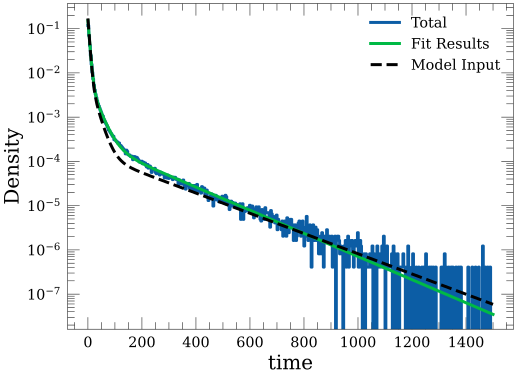

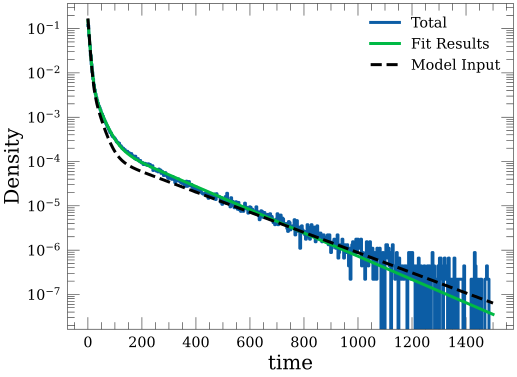

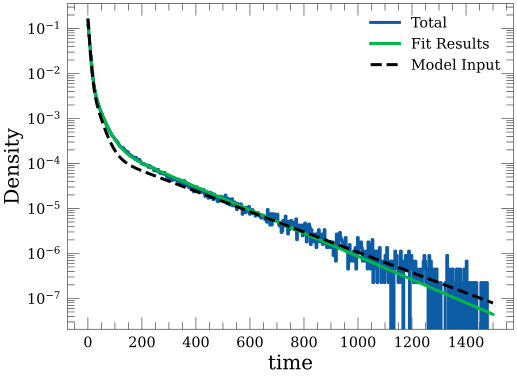

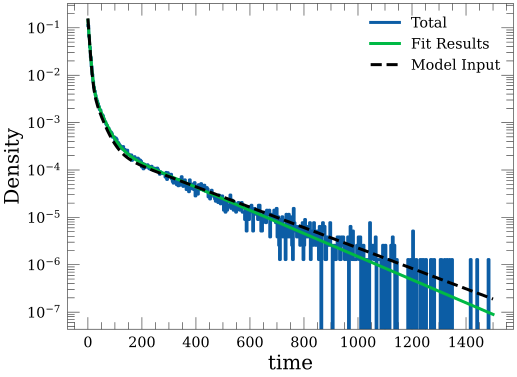

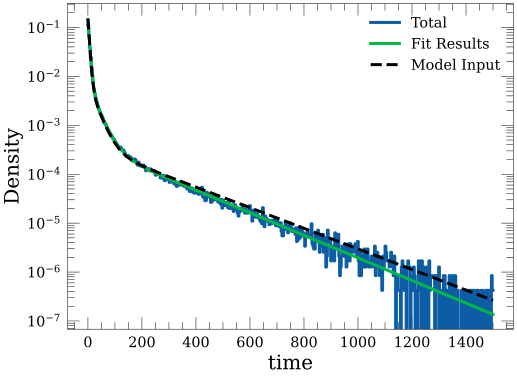

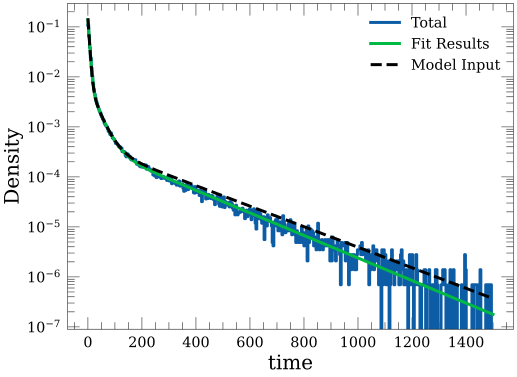

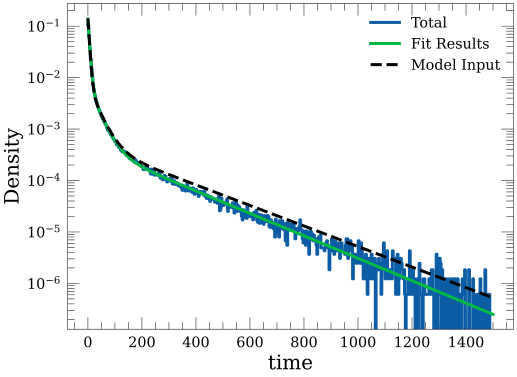

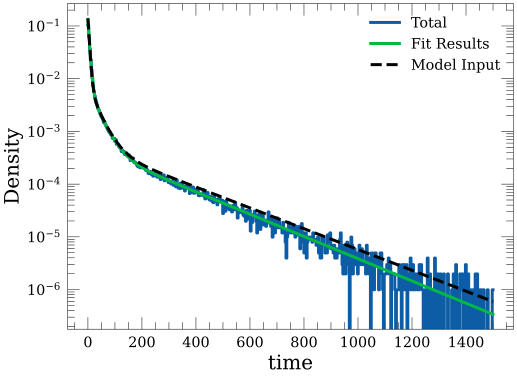

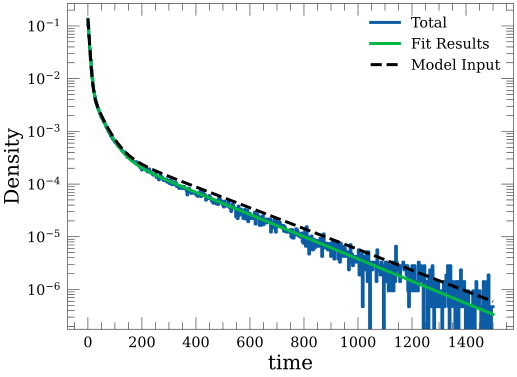

In [91]:
from HistTools import GetBinCenter
# v_t = np.linspace(0, bins_time_profile[-1], 200)
v_t = np.linspace(0, 1500, 500)
for N_nuclei in set(df_time["N_nuclei"]):
    plt.figure()
    dict_time_constant = {}
    for time_constant in dict_func_model.keys():
        dict_time_constant[time_constant] = float( dict_func_model[time_constant](df_time[df_time["N_nuclei"]==N_nuclei]["dE/dx"].iloc[0]) )
    print(dict_time_constant)
    v_model = Exp_3Components(v_t, dict_time_constant["tau1"], dict_time_constant["tau2"], dict_time_constant["tau3"],
                                dict_time_constant["N1"], dict_time_constant["N2"], dict_time_constant["N3"])
    # h = sns.histplot(df_time[(df_time["N_nuclei"]==N_nuclei) & (df_time["source"]==0)]["time"], bins=bins_time_profile, stat="density",
    #                  element="step", fill=False, label="Main Track")
    # h = sns.histplot(df_time[(df_time["N_nuclei"]==N_nuclei) & (df_time["source"]==1)]["time"], bins=bins_time_profile, stat="density",
    #                  element="step", fill=False, label="Electron")
    h = sns.histplot(df_time[(df_time["N_nuclei"]==N_nuclei) ]["time"], bins=v_t, stat="density",
                     element="step", fill=False, label="Total")
    # scale = v_profile[200]/h[0][200]

    df_fit_particle = df_fit[df_fit["N_nuclei"]==N_nuclei]
    v_fit = Exp_3Components(v_t, float(df_fit_particle["tau1"]), float(df_fit_particle["tau2"]), float(df_fit_particle["tau3"]),
                                float(df_fit_particle["N1"]), float(df_fit_particle["N2"]), float(df_fit_particle["N3"]) )
    plt.plot(v_t,v_fit, label="Fit Results")
    plt.plot(v_t,v_model, label="Model Input", ls="--",color="black")
    plt.legend()
    plt.semilogy()
    # break